In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import tqdm
import blimpy as bl
import turbo_seti

import setigen as stg
import scipy.special
import scipy.stats
from astropy.stats import sigma_clip

from astropy import units as u
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord

# import sprofiler as sp
import numpy as np

In [2]:
%matplotlib inline

65536


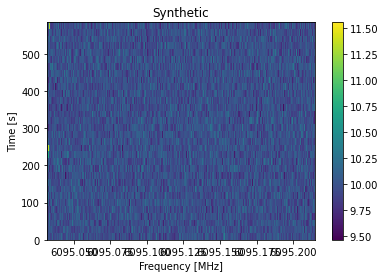

blimpy.waterfall INFO     Conversion time: 0.09sec

turbo_seti version 2.1.7
blimpy version 2.0.18
h5py version 2.10.0

data_handler    INFO     Filterbank file detected. Attempting to create .h5 file in current directory...
blimpy.waterfall INFO     Conversion time: 0.08sec
blimpy.io.base_reader WARNING  blimpy:io:base_reader:adjust_n_coarse_chan: n_coarse_chan=0.0625, nchans=65536
blimpy.io.base_reader WARNING  blimpy:io:base_reader:adjust_n_coarse_chan: n_coarse_chan < 1. Replacing that with a value of 64 (SWAG).
HDF5 header info: {'DIMENSION_LABELS': array([b'time', b'feed_id', b'frequency'], dtype=object), 'az_start': 0.0, 'data_type': 1, 'fch1': 6095.214842353015, 'foff': -2.7939677238464355e-06, 'ibeam': -1, 'machine_id': 20, 'nbeams': 1, 'nbits': 32, 'nchans': 65536, 'nifs': 1, 'rawdatafile': 'Synthetic', 'source_name': 'Synthetic', 'src_dej': <Angle -28.3831 deg>, 'src_raj': <Angle 17.7875 hourangle>, 'telescope_id': 6, 'tsamp': 18.253611008, 'tstart': 58465.717094907406, 'za_

In [23]:
N = 1e5
N=2**int(np.log(N)/np.log(2))
print(N)

frame = stg.Frame(fchans=N*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.253611008*u.s,
                  fch1=6095.214842353016*u.MHz)
noise = frame.add_noise(x_mean=10, noise_type='chi2')
frame.add_constant_signal(f_start=frame.get_frequency(200),
                          drift_rate=2*u.Hz/u.s,
                          level=frame.get_intensity(snr=30),
                          width=40*u.Hz,
                          f_profile_type='sinc2')
frame.bl_plot()
plt.show()

frame.save_fil('frame.fil')
fdop = turbo_seti.FindDoppler(datafile='frame.fil', max_drift=3, snr=10)
fdop.search()

!cat frame.dat

512


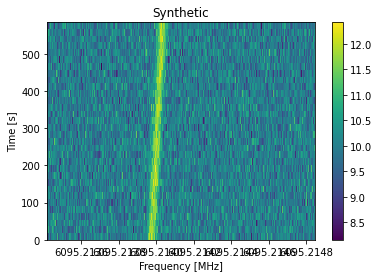

blimpy.waterfall INFO     Conversion time: 0.00sec

turbo_seti version 2.1.7
blimpy version 2.0.18
h5py version 2.10.0

data_handler    INFO     Filterbank file detected. Attempting to create .h5 file in current directory...
blimpy.waterfall INFO     Conversion time: 0.01sec
blimpy.io.base_reader WARNING  blimpy:io:base_reader:adjust_n_coarse_chan: n_coarse_chan=0.00048828125, nchans=512
blimpy.io.base_reader WARNING  blimpy:io:base_reader:adjust_n_coarse_chan: n_coarse_chan < 1. Replacing that with a value of 64 (SWAG).
HDF5 header info: {'DIMENSION_LABELS': array([b'time', b'feed_id', b'frequency'], dtype=object), 'az_start': 0.0, 'data_type': 1, 'fch1': 6095.214842353015, 'foff': -2.7939677238464355e-06, 'ibeam': -1, 'machine_id': 20, 'nbeams': 1, 'nbits': 32, 'nchans': 512, 'nifs': 1, 'rawdatafile': 'Synthetic', 'source_name': 'Synthetic', 'src_dej': <Angle -28.3831 deg>, 'src_raj': <Angle 17.7875 hourangle>, 'telescope_id': 6, 'tsamp': 18.253611008, 'tstart': 58465.717094907406, '

In [28]:
!rm frame.dat

N = 1e3
N=2**int(np.log(N)/np.log(2))
print(N)

frame = stg.Frame(fchans=N*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.253611008*u.s,
                  fch1=6095.214842353016*u.MHz)
noise = frame.add_noise(x_mean=10, noise_type='chi2')
frame.add_constant_signal(f_start=frame.get_frequency(200),
                          drift_rate=0.1*u.Hz/u.s,
                          level=frame.get_intensity(snr=30),
                          width=40*u.Hz,
                          f_profile_type='sinc2')
frame.bl_plot()
plt.show()

frame.save_fil('frame.fil')
fdop = turbo_seti.FindDoppler(datafile='frame.fil', max_drift=3, snr=10)
fdop.search()

!cat frame.dat

8388608


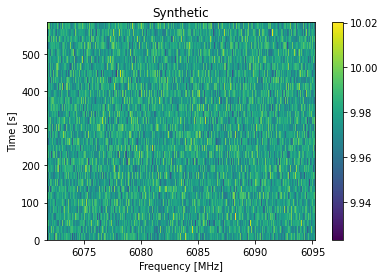

blimpy.waterfall INFO     Conversion time: 11.11sec

turbo_seti version 2.1.7
blimpy version 2.0.18
h5py version 2.10.0

data_handler    INFO     Filterbank file detected. Attempting to create .h5 file in current directory...
blimpy.waterfall INFO     Conversion time: 8.76sec
HDF5 header info: {'DIMENSION_LABELS': array([b'time', b'feed_id', b'frequency'], dtype=object), 'az_start': 0.0, 'data_type': 1, 'fch1': 6095.214842353015, 'foff': -2.7939677238464355e-06, 'ibeam': -1, 'machine_id': 20, 'nbeams': 1, 'nbits': 32, 'nchans': 8388608, 'nifs': 1, 'rawdatafile': 'Synthetic', 'source_name': 'Synthetic', 'src_dej': <Angle -28.3831 deg>, 'src_raj': <Angle 17.7875 hourangle>, 'telescope_id': 6, 'tsamp': 18.253611008, 'tstart': 58465.717094907406, 'za_start': 0.0}

Starting ET search with parameters: datafile=frame.fil, max_drift=3, min_drift=1e-05, snr=10, out_dir=./, coarse_chans=None, flagging=False, n_coarse_chan=8, kernels=None, gpu_id=0, gpu_backend=False, blank_dc=True, precision=2, 

In [35]:
!rm frame.dat

N = 1e7
N=2**int(np.log(N)/np.log(2))
print(N)

frame = stg.Frame(fchans=N*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.253611008*u.s,
                  fch1=6095.214842353016*u.MHz)
noise = frame.add_noise(x_mean=10, noise_type='chi2')
frame.add_constant_signal(f_start=frame.get_frequency(200),
                          drift_rate=0.1*u.Hz/u.s,
                          level=frame.get_intensity(snr=30),
                          width=40*u.Hz,
                          f_profile_type='sinc2')
frame.bl_plot()
plt.show()

frame.save_fil('frame.fil')
fdop = turbo_seti.FindDoppler(datafile='frame.fil', max_drift=3, snr=10)
fdop.search()

!cat frame.dat

8192


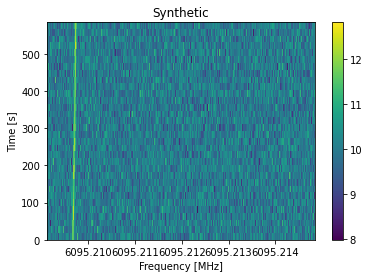

blimpy.waterfall INFO     Conversion time: 0.01sec

turbo_seti version 2.1.7
blimpy version 2.0.18
h5py version 2.10.0

data_handler    INFO     Filterbank file detected. Attempting to create .h5 file in current directory...
blimpy.waterfall INFO     Conversion time: 0.01sec
blimpy.io.base_reader WARNING  blimpy:io:base_reader:adjust_n_coarse_chan: n_coarse_chan=0.001953125, nchans=2048
blimpy.io.base_reader WARNING  blimpy:io:base_reader:adjust_n_coarse_chan: n_coarse_chan < 1. Replacing that with a value of 64 (SWAG).
HDF5 header info: {'DIMENSION_LABELS': array([b'time', b'feed_id', b'frequency'], dtype=object), 'az_start': 0.0, 'data_type': 1, 'fch1': 6095.214842353015, 'foff': -2.7939677238464355e-06, 'ibeam': -1, 'machine_id': 20, 'nbeams': 1, 'nbits': 32, 'nchans': 2048, 'nifs': 1, 'rawdatafile': 'Synthetic', 'source_name': 'Synthetic', 'src_dej': <Angle -28.3831 deg>, 'src_raj': <Angle 17.7875 hourangle>, 'telescope_id': 6, 'tsamp': 18.253611008, 'tstart': 58465.717094907406, '

In [40]:
!rm frame.dat

N = 1e4
N=2**int(np.log(N)/np.log(2))
print(N)
N = 8192 //4

frame = stg.Frame(fchans=N*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.253611008*u.s,
                  fch1=6095.214842353016*u.MHz)
noise = frame.add_noise(x_mean=10, noise_type='chi2')
frame.add_constant_signal(f_start=frame.get_frequency(200),
                          drift_rate=0.1*u.Hz/u.s,
                          level=frame.get_intensity(snr=30),
                          width=40*u.Hz,
                          f_profile_type='sinc2')
frame.bl_plot()
plt.show()

frame.save_fil('frame.fil')
fdop = turbo_seti.FindDoppler(datafile='frame.fil', max_drift=3, snr=10)
fdop.search()

!cat frame.dat

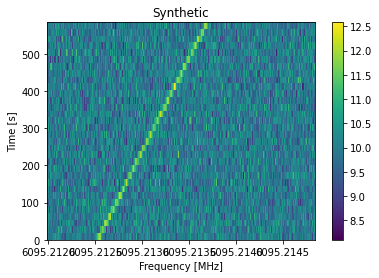

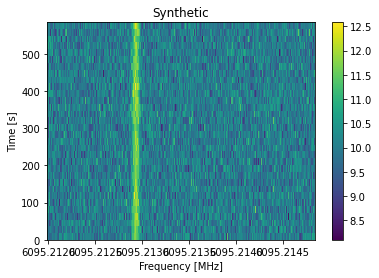

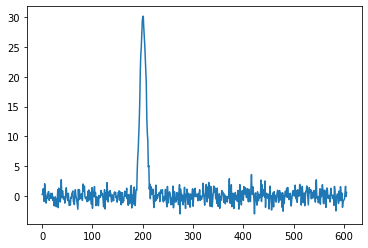

In [46]:
N = 1024

frame = stg.Frame(fchans=N*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.253611008*u.s,
                  fch1=6095.214842353016*u.MHz)
noise = frame.add_noise(x_mean=10, noise_type='chi2')
frame.add_constant_signal(f_start=frame.get_frequency(200),
                          drift_rate=2*u.Hz/u.s,
                          level=frame.get_intensity(snr=30),
                          width=40*u.Hz,
                          f_profile_type='sinc2')
frame.bl_plot()
plt.show()

frame = stg.dedrift(frame, drift_rate=2)
frame.bl_plot()
plt.show()

s = frame.integrate(normalize=True)
plt.plot(s)
plt.show()

In [50]:
frame.noise_mean, frame.noise_std

(10.02006287115, 0.9890391982775931)

In [51]:
np_arr = frame.data
low, median, high = np.percentile(np_arr, [5, 50, 95])
drop_high = np_arr[np_arr <= high]
drop_outliers = drop_high[drop_high >= low]
stdev = drop_outliers.std()

median, stdev

(10.014893916120919, 0.8305090691133591)

In [52]:
frame.data.shape

(32, 606)

1.0089741750597505


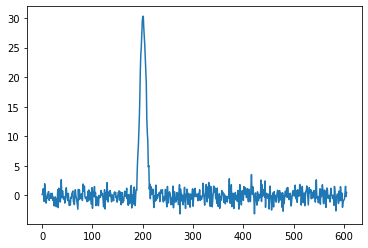

1.2015702733375966


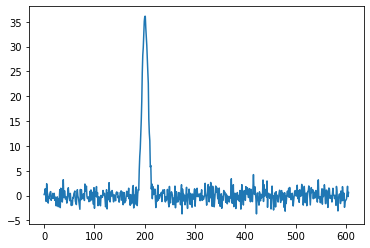

In [63]:
spectrum = np.mean((frame.data - frame.noise_mean) / frame.noise_std * frame.tchans**0.5, axis=0)
plt.plot(spectrum)
print(sigma_clip(spectrum).std())
plt.show()

spectrum = np.mean((frame.data - median) / stdev * frame.tchans**0.5, axis=0)
plt.plot(spectrum)
print(sigma_clip(spectrum).std())
plt.show()

In [ ]:
frame = stg.Frame(fchans=1024,
                  tchans=32,
                  df=2.7939677238464355*u.Hz,
                  dt=18.253611008*u.s,
                  fch1=6095.214842353016*u.MHz)
noise = frame.add_noise(x_mean=10, noise_type='chi2')
frame.add_constant_signal(f_start=frame.get_frequency(200),
                          drift_rate=2*u.Hz/u.s,
                          level=frame.get_intensity(snr=30),
                          width=40*u.Hz,
                          f_profile_type='sinc2')

# Dedrift
dd_frame = stg.dedrift(frame, drift_rate=2)

# Integrate for setigen SNR estimate
n_spec = dd_frame.integrate(normalize=True)
# which just does..
n_spec = np.mean((dd_frame.data - dd_frame.noise_mean) / dd_frame.noise_std * dd_frame.tchans**0.5, axis=0)
SNR = np.max(n_spec)

# TurboSETI SNR estimate
np_arr = dd_frame.data
low, median, high = np.percentile(np_arr, [5, 50, 95])
drop_high = np_arr[np_arr <= high]
drop_outliers = drop_high[drop_high >= low]
stdev = drop_outliers.std()
n_spec = np.mean((dd_frame.data - median) / stdev * dd_frame.tchans**0.5, axis=0)
SNR = np.max(n_spec)


30.55863301472384
0.051689615104453114
1.0037948314108553


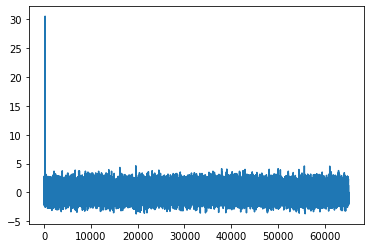

38.14853633479813
0.22573663818983303
1.247804797400958


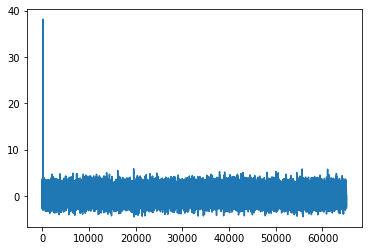

In [81]:
frame = stg.Frame(fchans=65536,
                  tchans=32,
                  df=2.7939677238464355*u.Hz,
                  dt=18.253611008*u.s,
                  fch1=6095.214842353016*u.MHz)
noise = frame.add_noise(x_mean=10, noise_type='chi2')
frame.add_constant_signal(f_start=frame.get_frequency(200),
                          drift_rate=2*u.Hz/u.s,
                          level=frame.get_intensity(snr=30),
                          width=40*u.Hz,
                          f_profile_type='sinc2')

# Dedrift
dd_frame = stg.dedrift(frame, drift_rate=2)

# Integrate for setigen SNR estimate
n_spec = dd_frame.integrate(normalize=True)
# which just does..
n_spec = np.mean((dd_frame.data - dd_frame.noise_mean) / dd_frame.noise_std * dd_frame.tchans**0.5, axis=0)
SNR = np.max(n_spec)
print(SNR)
plt.plot(n_spec)
print(sigma_clip(n_spec).std())
plt.show()

# TurboSETI SNR estimate
np_arr = dd_frame.data
low, median, high = np.percentile(np_arr, [5, 50, 95])
drop_high = np_arr[np_arr <= high]
drop_outliers = drop_high[drop_high >= low]
stdev = drop_outliers.std()
n_spec = np.mean((dd_frame.data - median) / stdev * dd_frame.tchans**0.5, axis=0)
SNR = np.max(n_spec)
print(SNR)
plt.plot(n_spec)
print(sigma_clip(n_spec).std())
plt.show()